In [75]:
#import Pkg 

In [76]:
#Pkg.add("CairoMakie")

In [77]:
#mkpath("Plots")


In [1]:
using CairoMakie

In [2]:
using AbstractAlgebra, Random
using AbstractAlgebra: lift
b=2
F = GF(b)
m = 4
s = 2
ρ = m 
t = m - ρ 
N = b^m

16

In [3]:
S = matrix_space(F, m, m)

Matrix space of 4 rows and 4 columns
  over finite field F_2

Point generation digital and reduced digital nets

In [4]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

16-element Vector{NTuple{4, Int64}}:
 (0, 0, 0, 0)
 (1, 0, 0, 0)
 (0, 1, 0, 0)
 (1, 1, 0, 0)
 (0, 0, 1, 0)
 (1, 0, 1, 0)
 (0, 1, 1, 0)
 (1, 1, 1, 0)
 (0, 0, 0, 1)
 (1, 0, 0, 1)
 (0, 1, 0, 1)
 (1, 1, 0, 1)
 (0, 0, 1, 1)
 (1, 0, 1, 1)
 (0, 1, 1, 1)
 (1, 1, 1, 1)

In [5]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [6]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [7]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [8]:
function point_gen(C,n,b)
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]   
    return v

end

point_gen (generic function with 1 method)

In [20]:
#  Use Ctrl+/ to comment out and back
if m == 2
    C_1 = [1 0; 0 1]
    C_2 = [0 1; 1 0]
    C_up = [1 1; 1 0]
elseif m == 3

    C_1 = [1 0 0; 0 1 0; 0 0 1]
    C_2 = [0 0 1; 0 1 0; 1 0 0]
    C_up = [1 1 1; 1 1 0; 1 0 0]
    #C_up = [0 0 1; 1 1 0; 1 0 1] # Observation/conj: all (0,3,2) nets have the same nrt_wts  

elseif m == 4 
    C_1 = [1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]
    C_2 = [1 1 0 1; 1 0 0 0; 0 1 1 0; 0 1 0 0]
    C_up = [1 1 1 1; 1 1 1 0; 1 1 0 0; 1 0 0 0]

elseif m == 5 
    C_1 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]
    # C_2 = [0 0 0 0 1; 0 0 0 1 0; 0 0 1 0 0; 0 1 0 0 0; 1 0 0 0 0]
    C_up = [1 1 1 1 1; 1 1 1 1 0; 1 1 1 0 0; 1 1 0 0 0; 1 0 0 0 0]
    C_2 = [0 1 0 1 1; 0 1 1 0 1; 1 0 1 1 1; 0 1 1 1 1; 1 1 0 0 0]
end
    
C_1, C_2, C_up  = S(C_1), S(C_2), S(C_up)
C = [C_1,C_2] 

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]
 [1 1 0 1; 1 0 0 0; 0 1 1 0; 0 1 0 0]

In [21]:
C_LP = [C_1, C_up]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]
 [1 1 1 1; 1 1 1 0; 1 1 0 0; 1 0 0 0]

In [23]:
C_2_r1 = [1 1 0 1; 1 0 0 0; 0 1 1 0; 0 0 0 0]
C_2_r1  = S(C_2_r1)
C_r1 = [C_1,C_2_r1]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]
 [1 1 0 1; 1 0 0 0; 0 1 1 0; 0 0 0 0]

In [24]:
collect(C_2_r1)

4×4 Matrix{AbstractAlgebra.GFElem{Int64}}:
 1  1  0  1
 1  0  0  0
 0  1  1  0
 0  0  0  0

In [11]:
det(C_2)

1

In [12]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [13]:
gen_all_points(C,b)
pts = gen_all_points(C,b)
#pts = sort(gen_all_points(C,b))
#pts_shift = [pts[i] .+ 0.02 for i in 1:length(pts)]


16-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.5, 0.75]
 [0.25, 0.6875]
 [0.75, 0.4375]
 [0.125, 0.125]
 [0.625, 0.875]
 [0.375, 0.5625]
 [0.875, 0.3125]
 [0.0625, 0.5]
 [0.5625, 0.25]
 [0.3125, 0.1875]
 [0.8125, 0.9375]
 [0.1875, 0.625]
 [0.6875, 0.375]
 [0.4375, 0.0625]
 [0.9375, 0.8125]

In [26]:
gen_all_points(C_r1,b)
pts_r1 = gen_all_points(C_r1,b)
#pts_lp = sort(gen_all_points(C_LP,b))

16-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.5, 0.75]
 [0.25, 0.625]
 [0.75, 0.375]
 [0.125, 0.125]
 [0.625, 0.875]
 [0.375, 0.5]
 [0.875, 0.25]
 [0.0625, 0.5]
 [0.5625, 0.25]
 [0.3125, 0.125]
 [0.8125, 0.875]
 [0.1875, 0.625]
 [0.6875, 0.375]
 [0.4375, 0.0]
 [0.9375, 0.75]

In [27]:
pts_unq= unique(pts)
nu_pts_unq=length(pts_unq)
pts_j_unq = unique(pts[j][2] for j in 1:b^m)

16-element Vector{BigFloat}:
 0.0
 0.75
 0.6875
 0.4375
 0.125
 0.875
 0.5625
 0.3125
 0.5
 0.25
 0.1875
 0.9375
 0.625
 0.375
 0.0625
 0.8125

In [28]:
pts_unq_r1= unique(pts_r1)
nu_pts_unq_r1=length(pts_unq_r1)
pts_j_unq_r1 = unique(pts_r1[j][2] for j in 1:b^m)

8-element Vector{BigFloat}:
 0.0
 0.75
 0.625
 0.375
 0.125
 0.875
 0.5
 0.25

In [96]:
# m = 5 Use Ctrl+/ to comment out and back
# w_1 = 0, w_2 =1
# C_cr1 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]
# C_cr2 = [0 0 0 0 1; 0 1 0 0 0; 1 0 0 0 0; 0 0 1 0 0; 0 0 0 0 0]
# C_cr1, C_cr2 = S(C_cr1), S(C_cr2)
# C_cr = [C_cr1,C_cr2]

In [97]:
# w_1 = 1, w_2 = 2
# C_cr1 = [1 1 1 1 0; 0 1 0 1 0; 0 0 1 1 0; 0 0 0 1 0; 0 0 0 0 0]
# C_cr2 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]
# C_cr1, C_cr2 = S(C_cr1), S(C_cr2)
# C_cr = [C_cr1,C_cr2]

In [98]:
#set_theme!(theme_ggplot2())

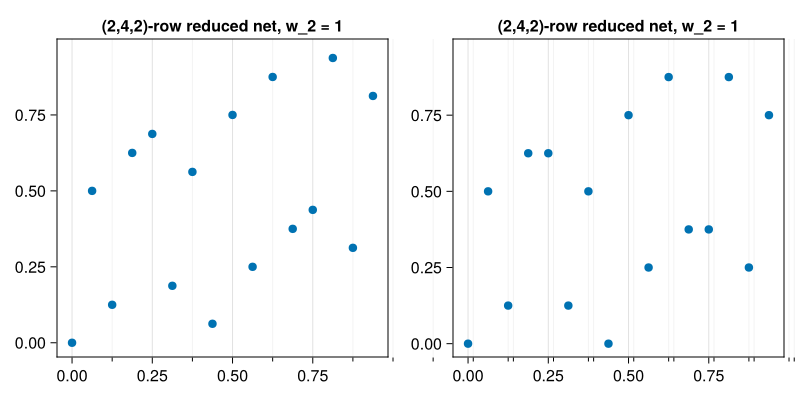

In [29]:
fig = Figure(resolution = (800, 400))

#kwargs = (; xminorticksvisible = true, xminorgridvisible = true)
#xticks = [0.0, 0.5, 1.0], yticks = [0.0, 0.5, 1.0]
#xminorticks = IntervalsBetween(4), xminorticksvisible = true, ygridvisible = false
#limits = (nothing,nothing, -0.05, 1)

#ax = Axis(fig[1,1], title = "", limits = (nothing,nothing, -0.05, 1))
#scatter!( Point2.(pts) )

# ax = Axis(fig[1,1],title = "Hammersley",limits = (nothing,nothing, nothing, 1), xticks = [0.0, 0.25, 0.5, 0.75], yticks = [0.0, 0.25, 0.5, 0.75], xminorgridvisible = false, yminorticksvisible = false)
# scatter!( Point2.(pts))

#ax = Axis(fig[1,1], title = "(0,4,2)- net", limits = (nothing,nothing, nothing, 1),  xticks = [0.0, 0.25, 0.5, 0.75], xminorticks = IntervalsBetween(4), xminorticksvisible = true, yticks = [0.0, 0.25, 0.5, 0.75],  xminorgridvisible = true, yminorticksvisible = false, ygridvisible = false)
#scatter!( Point2.(pts_shift) )

# ax = Axis(fig[1,2], title = "Upper-1-mat", limits = (nothing,nothing, nothing, 1), xticks = [0.0, 0.25, 0.5, 0.75], yticks = [0.0, 0.25, 0.5, 0.75],xminorgridvisible = false, yminorticksvisible = false)
# scatter!( Point2.(pts_lp) )

#ax = Axis(fig[2,1], title = "(2,5,2)-row reduced net, w_2 = 2", limits = (nothing,nothing, nothing, 1), xticks = [0.0, 0.25, 0.5, 0.75], yticks = [0.0, 0.25, 0.5, 0.75],xminorgridvisible = false, yminorticksvisible = false)
#scatter!( Point2.(pts_rr_shift) )

#ax = Axis(fig[2,2], title = "(2,5,2)-row reduced net, w_2 = 3", limits = (nothing,nothing, nothing, 1), xticks = [0.0, 0.5, 1.0], yticks = [0.0, 0.5, 1.0],xminorgridvisible = false, yminorticksvisible = false)
#scatter!( Point2.(pts_rrr_shift) )

ax = Axis(fig[1,1], title = "(2,4,2)-row reduced net, w_2 = 1", limits = (nothing,nothing, nothing, 1),  xticks = [0.0, 0.25, 0.5, 0.75], xminorticks = IntervalsBetween(2), xminorticksvisible = true, yticks = [0.0, 0.25, 0.5, 0.75],  xminorgridvisible = true, yminorticksvisible = false, ygridvisible = false)
scatter!( Point2.(pts) )

ax = Axis(fig[1,2], title = "(2,4,2)-row reduced net, w_2 = 1", limits = (nothing,nothing, nothing, 1),  xticks = [0.0, 0.25, 0.5, 0.75], xminorticks = IntervalsBetween(2), xminorticksvisible = true, yticks = [0.0, 0.25, 0.5, 0.75],  xminorgridvisible = true, yminorticksvisible = false, ygridvisible = false)
scatter!( Point2.(pts_r1) )

#ax = Axis(fig[1,3], title = "(2,4,2)-row reduced net, w_2 = 2", limits = (nothing,nothing, nothing, 1),  xticks = [0.0, 0.25, 0.5, 0.75], xminorticks = IntervalsBetween(2), xminorticksvisible = true, yticks = [0.0, 0.25, 0.5, 0.75],  xminorgridvisible = true, yminorticksvisible = false, ygridvisible = false)
#scatter!( Point2.(pts_rr_shift) )

#ax = Axis(fig[1,3], title = "col-row reduced point set")
#scatter!( Point2.(pts_rr) )

#save("Plots/Digital_net_t2_w123_rowred_m5_shift.png", fig)
#save("Plots/Digital_net_t2_w123_rowred_m5_shift.svg", fig)
fig